# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [12]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

In [13]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"

#Define empty lists to store values
cloudiness = []
country = []
date = []
max_temp = []
humidity = []
lat = []
lng = []
wind_speed = []
city_name = []

#Looping through cities to make api calls using city as query
i = 1
for city in cities:
    city=city
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    response = requests.get(query_url).json()
    
#Extracting data. Missing data is handled by try and except  
    try:
        
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        max_temp.append(response["main"]['temp_max'])
        humidity.append(response["main"]['humidity'])
        lat.append(response["coord"]["lat"])  
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_name.append(response["name"])
        print(f"Processing record {i}|{city}")
        i+=1
    except (KeyError):
        print("City not found. skipping.")


Processing record 1|caxito
Processing record 2|tuktoyaktuk
Processing record 3|bredasdorp
Processing record 4|mar del plata
Processing record 5|atuona
Processing record 6|rikitea
Processing record 7|albany
City not found. skipping.
Processing record 8|hamilton
City not found. skipping.
Processing record 9|van
Processing record 10|new norfolk
Processing record 11|carnarvon
Processing record 12|puerto ayora
Processing record 13|kapaa
Processing record 14|hualmay
Processing record 15|airai
Processing record 16|saldanha
Processing record 17|sinazongwe
Processing record 18|rangpur
Processing record 19|killybegs
Processing record 20|punta arenas
Processing record 21|aklavik
Processing record 22|cockburn town
Processing record 23|hofn
Processing record 24|provideniya
Processing record 25|tateyama
Processing record 26|suslovo
Processing record 27|hermanus
Processing record 28|cape town
Processing record 29|kodinsk
Processing record 30|kruisfontein
Processing record 31|labuhan
Processing record

Processing record 254|norden
Processing record 255|kavaratti
Processing record 256|huangnihe
Processing record 257|santa vitoria do palmar
Processing record 258|cairns
Processing record 259|oksfjord
City not found. skipping.
Processing record 260|dhidhdhoo
Processing record 261|saint anthony
Processing record 262|sobolevo
Processing record 263|saint-joseph
Processing record 264|valparaiso
Processing record 265|faanui
Processing record 266|kodinar
Processing record 267|hambantota
Processing record 268|richards bay
Processing record 269|xiuyan
Processing record 270|batagay
City not found. skipping.
Processing record 271|honningsvag
Processing record 272|chicama
Processing record 273|khuzhir
Processing record 274|batos
Processing record 275|vao
City not found. skipping.
City not found. skipping.
Processing record 276|bilma
Processing record 277|coffs harbour
Processing record 278|banjar
Processing record 279|shyryayeve
Processing record 280|khandagayty
Processing record 281|suntar
Process

City not found. skipping.
Processing record 497|guerrero negro
Processing record 498|quatre cocos
Processing record 499|ingham
Processing record 500|kontagora
Processing record 501|vigrestad
Processing record 502|guadalupe y calvo
Processing record 503|margate
Processing record 504|kem
Processing record 505|sinnamary
City not found. skipping.
Processing record 506|ordu
Processing record 507|washougal
Processing record 508|caravelas
Processing record 509|rawson
Processing record 510|camacupa
Processing record 511|ouadda
Processing record 512|tiznit
Processing record 513|galdar
Processing record 514|ampanihy
Processing record 515|grao mogol
City not found. skipping.
Processing record 516|maceio
Processing record 517|la asuncion
Processing record 518|zhuhai
Processing record 519|saint-pierre
Processing record 520|qingdao
Processing record 521|chifeng
Processing record 522|kotturu
Processing record 523|beloomut
Processing record 524|port blair
Processing record 525|husyatyn
City not found.

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
#Creating city dataframe
city_df = pd.DataFrame({"City":city_name, 
                        "Cloudiness":cloudiness, 
                        "Country":country, 
                        "Date":date, 
                        "Humidity":humidity,
                        "Lat":lat,
                        "Lng":lng,
                        "Max Temp":max_temp,
                        "Wind Speed":wind_speed
                                         })
city_df = city_df.rename_axis('City ID')

#Exporting data to csv
city_df.to_csv("../output_data/cities.csv")

#Displaying dataframe
city_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City ID,,,,,,,,,
0,Caxito,75,AO,1612480190,78,-8.5785,13.6643,80.60,6.91
1,Tuktoyaktuk,75,CA,1612480134,67,69.4541,-133.0374,-34.60,11.50
2,Bredasdorp,90,ZA,1612480190,77,-34.5322,20.0403,68.00,5.75
3,Mar del Plata,40,AR,1612480186,77,-38.0023,-57.5575,64.99,10.36
4,Atuona,25,PF,1612480190,71,-9.8000,-139.0333,78.58,10.98


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

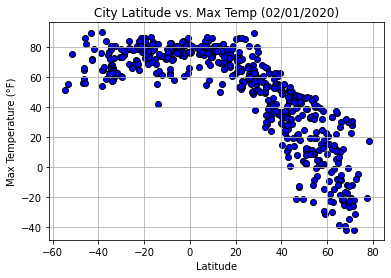

In [28]:
# Create Scatter Plot for Each Data Type
plt.scatter(city_df["Lat"], city_df["Max Temp"], facecolors="blue", marker="o", edgecolor="black")

# Include Other Graph Properties
plt.title("City Latitude vs. Max Temp (02/01/2020)")
plt.ylabel("Max Temperature (°F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("../output_data\Fig1.png")

# Show Plot
plt.show()

# This plot is analysing the relationship between city latitude and temperature. 


## Latitude vs. Humidity Plot

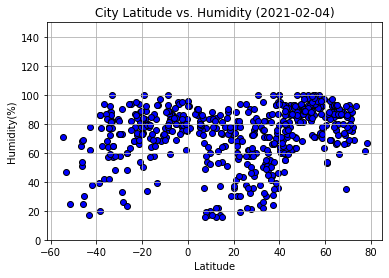

In [29]:
plt.scatter(city_df["Lat"], city_df["Humidity"], marker = "o", color = "blue",edgecolor = "black")
plt.grid()
plt.ylim(0, city_df["Humidity"].max()+50)
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title(f"City Latitude vs. Humidity ({shortened_timestamp})")
plt.savefig("../output_data\Fig2.png")
plt.show()

## This plot is analysing the relationship between city latitude and humidity. 

## Latitude vs. Cloudiness Plot

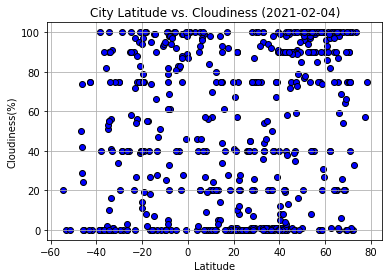

In [30]:
plt.scatter(city_df["Lat"], city_df["Cloudiness"], marker = "o", color = "blue",edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title(f"City Latitude vs. Cloudiness ({shortened_timestamp})")
plt.savefig("../output_data\Fig3.png")
plt.show()

# This plot is analysing the relationship between city latitude and cloudiness. 

## Latitude vs. Wind Speed Plot

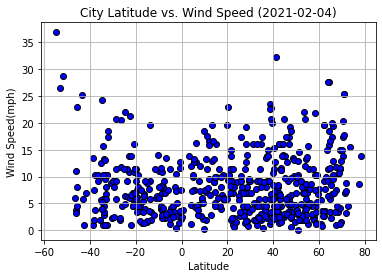

In [31]:
plt.scatter(city_df["Lat"], city_df["Wind Speed"], marker = "o", color = "blue",edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.title(f"City Latitude vs. Wind Speed ({shortened_timestamp})")
plt.savefig("../output_data\Fig4.png")
plt.show()

# This plot is analysing the relationship between city latitude and wind speed.

## Linear Regression

In [33]:
# OPTIONAL: Create a function to create Linear Regression plots
# Add the linear regression equation and line to plot
def linear_reg_plot(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red")
    plt.xlabel("Latitude")
    print(f"The r-squared is: {rvalue}")
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8555510153396985


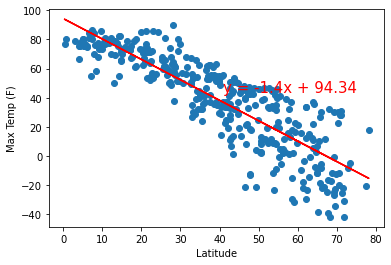

None


In [34]:
# Create Northern and Southern Hemisphere DataFrames
Northern_hemisphere = city_df.loc[city_df["Lat"]>0]
Southern_hemisphere = city_df.loc[city_df["Lat"]<0]

x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Max Temp"]
plt.ylabel("Max Temp (F)")
print(linear_reg_plot(x_values,y_values))

# There is a direct correlation between the latitude and temperature at the Northern Hemisphere. As the latitude increases, the temperature increases. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.3046347422676662


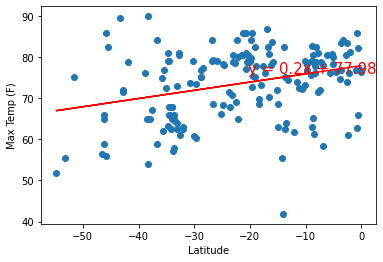

None


In [35]:
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Max Temp"]
plt.ylabel("Max Temp (F)")
print(linear_reg_plot(x_values,y_values))

# There is a direct correlation between the latitude and temperature at the Souther Hemisphere. As the latitude increases, the temperature increases. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.3936947174898315


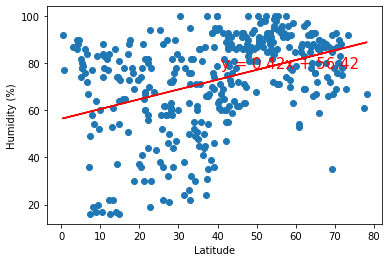

None


In [36]:
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Humidity"]
plt.ylabel("Humidity (%)")
print(linear_reg_plot(x_values,y_values))

# There is a direct correlation between latitude and humidity at the Northern Hemisphere. As the humidity increases, so does the latitude. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.42972215070017084


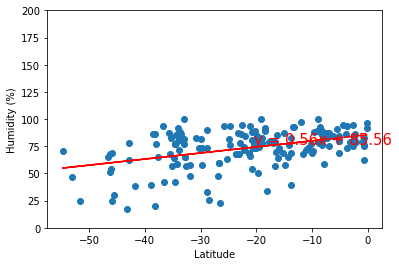

None


In [37]:
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Humidity"]
plt.ylim(0, y_values.max()+100)
plt.ylabel("Humidity (%)")
print(linear_reg_plot(x_values,y_values))

# There is a direct correlation between humidity and latitude at the Southern Hemisphere. As the humidity increases, so does the latitude. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.28810001010922964


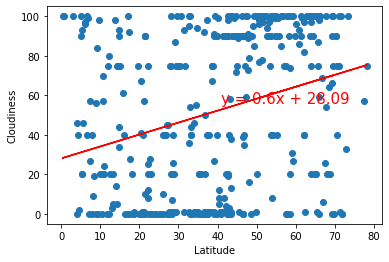

None


In [38]:
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Cloudiness"]
plt.ylabel("Cloudiness")
print(linear_reg_plot(x_values,y_values))

# There is a direct correlation between latitude and cloudiness at the Northern Hemisphere. As the cloudiness increases, so does the latitude. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.347645393941907


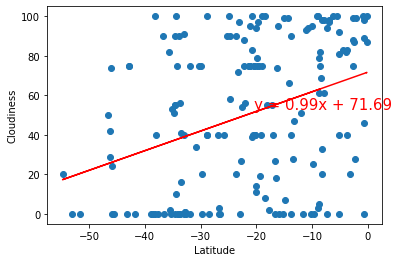

None


In [39]:
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Cloudiness"]
plt.ylabel("Cloudiness")
print(linear_reg_plot(x_values,y_values))

# There is a direct correlation between latitude and cloudiness at the Southern Hemisphere. As the cloudiness increases, so does the latitude. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.08627279672720142


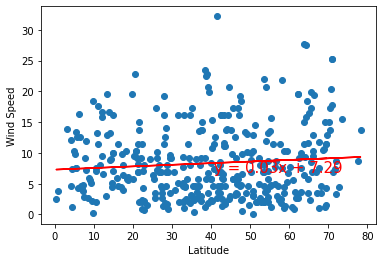

None


In [40]:
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Wind Speed"]
plt.ylabel("Wind Speed")
print(linear_reg_plot(x_values,y_values))

# As the latitude increases, the wind speed remains almost the same at the Northern Hemisphere. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.3357733028048196


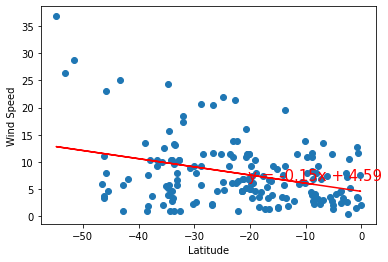

None


In [41]:
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Wind Speed"]
plt.ylabel("Wind Speed")
print(linear_reg_plot(x_values,y_values))

# There is an indirect correlation between latitude and wind speed at the Souther Hemisphere. As the latitude increases, the wind speed decreases. 